# Questions:
### What is the best way to optimize a story based on metrics?
### What Metrics are most important for upvotes and following conversations?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('storiesDB.xlsx')
df.sample(5)

,id,subreddit,date,time_of_day,title_length,title_word_count,title_avg_word_length,title_syllables,title_reading_score,title_reading_grade,...,amount_sentences,avg_words_per_sentence,avg_syllables_per_sentence,avg_polarity_per_sentence,avg_subjectivity_per_sentence,avg_readscore_per_sentence,num_comments,upvotes,upvote_ratio,downvotes
7568,byii3u,tifu,06-09-2019,Dawn,31,6,4.167,12,31.55,9th and 10th grade,...,30,13.000,17.133,0.164,0.431,79.467,487,33797,0.88,4608
14679,gk2o2z,TalesFromThePharmacy,05-15-2020,Midnight,138,25,4.480,36,63.02,8th and 9th grade,...,4,19.500,25.000,0.007,0.047,90.600,29,586,0.99,5
8446,2dhcff,relationships,08-13-2014,Evening,87,19,3.211,22,86.03,5th and 6th grade,...,31,15.258,19.290,0.092,0.284,73.978,169,2226,0.94,142
8260,ahyb01,CasualConversation,01-20-2019,Morning,50,10,4.000,15,69.79,7th and 8th grade,...,21,13.619,18.095,0.172,0.477,74.623,339,6551,0.97,202
951,xyftnw,nosleep,10-07-2022,Night,36,9,3.111,9,113.10,3rd and 4th grade,...,377,10.133,12.350,0.019,0.216,93.140,147,5531,0.99,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22722 entries, 0 to 22721
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             22722 non-null  object 
 1   subreddit                      22722 non-null  object 
 2   date                           22722 non-null  object 
 3   time_of_day                    22722 non-null  object 
 4   title_length                   22722 non-null  int64  
 5   title_word_count               22722 non-null  int64  
 6   title_avg_word_length          22722 non-null  float64
 7   title_syllables                22722 non-null  int64  
 8   title_reading_score            22722 non-null  float64
 9   title_reading_grade            22722 non-null  object 
 10  title_reading_difficulty       22722 non-null  object 
 11  title_polarity                 22722 non-null  float64
 12  title_subjectivity             22722 non-null 

In [28]:
df.describe()

,title_length,title_word_count,title_avg_word_length,title_syllables,title_reading_score,title_polarity,title_subjectivity,story_length,story_word_count,story_avg_word_length,...,amount_sentences,avg_words_per_sentence,avg_syllables_per_sentence,avg_polarity_per_sentence,avg_subjectivity_per_sentence,avg_readscore_per_sentence,num_comments,upvotes,upvote_ratio,downvotes
count,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,...,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000,22168.000000
mean,66.221806,12.471536,4.316905,16.581875,81.012891,0.015911,0.264313,3298.987550,618.697447,4.110179,...,40.692169,17.210502,22.251979,0.043641,0.318539,78.542389,574.813019,8262.677057,0.956172,771.591619
std,47.139464,8.677201,0.887642,11.749332,21.412172,0.262411,0.323817,4050.323778,750.362610,0.369418,...,57.841533,7.592425,9.845160,0.083962,0.101851,12.907057,1157.277636,12168.274945,0.048986,2139.884523
min,2.000000,1.000000,1.000000,1.000000,0.080000,-1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.897000,1.000000,-1.000000,0.000000,0.240000,0.000000,0.000000,0.370000,0.000000
25%,36.000000,7.000000,3.750000,9.000000,68.770000,0.000000,0.000000,1221.750000,232.000000,3.907000,...,14.000000,13.056000,16.587250,-0.001000,0.255000,73.593000,81.000000,1257.750000,0.950000,19.000000
50%,55.000000,10.000000,4.200000,14.000000,83.320000,0.000000,0.067000,2127.000000,404.000000,4.055000,...,24.000000,16.250000,20.872000,0.037000,0.313000,80.589000,198.000000,3388.000000,0.970000,80.000000
75%,82.000000,16.000000,4.733000,21.000000,95.170000,0.025000,0.500000,3614.000000,679.000000,4.228000,...,43.000000,19.970250,25.974500,0.082000,0.377000,86.353250,485.000000,8984.250000,0.990000,428.000000
max,300.000000,64.000000,38.000000,81.000000,121.220000,1.000000,1.000000,39996.000000,7709.000000,9.000000,...,864.000000,333.000000,397.000000,1.000000,1.000000,121.220000,22821.000000,216188.000000,1.000000,101735.000000


In [29]:
df['title_word_count'].median()

10.0

### Fixing general errors with the dataset

In [19]:
#Basically just fixes the reading scores to be within the correct range, there as an error where the scores went beyond and thus this just keeps the data with proper read scores

rd_score_cols = ['story_reading_score', 'title_reading_score', 'avg_readscore_per_sentence']
def fix_rd_score(data, col):
    return data[(data[col] >= 0) & (data[col] < 122)]

for col in rd_score_cols:
    df = fix_rd_score(df, col)
    
df.shape

(22168, 32)

In [15]:
def graph(grpby, sort_by, legend, xlbl, ylbl, title, plot):
    df.groupby(grpby).count().sort_values(by=[sort_by])['upvotes'].plot(kind=plot)
    plt.legend([legend])
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)

### Graph: Aiming to see how upvotes change depending on time of day

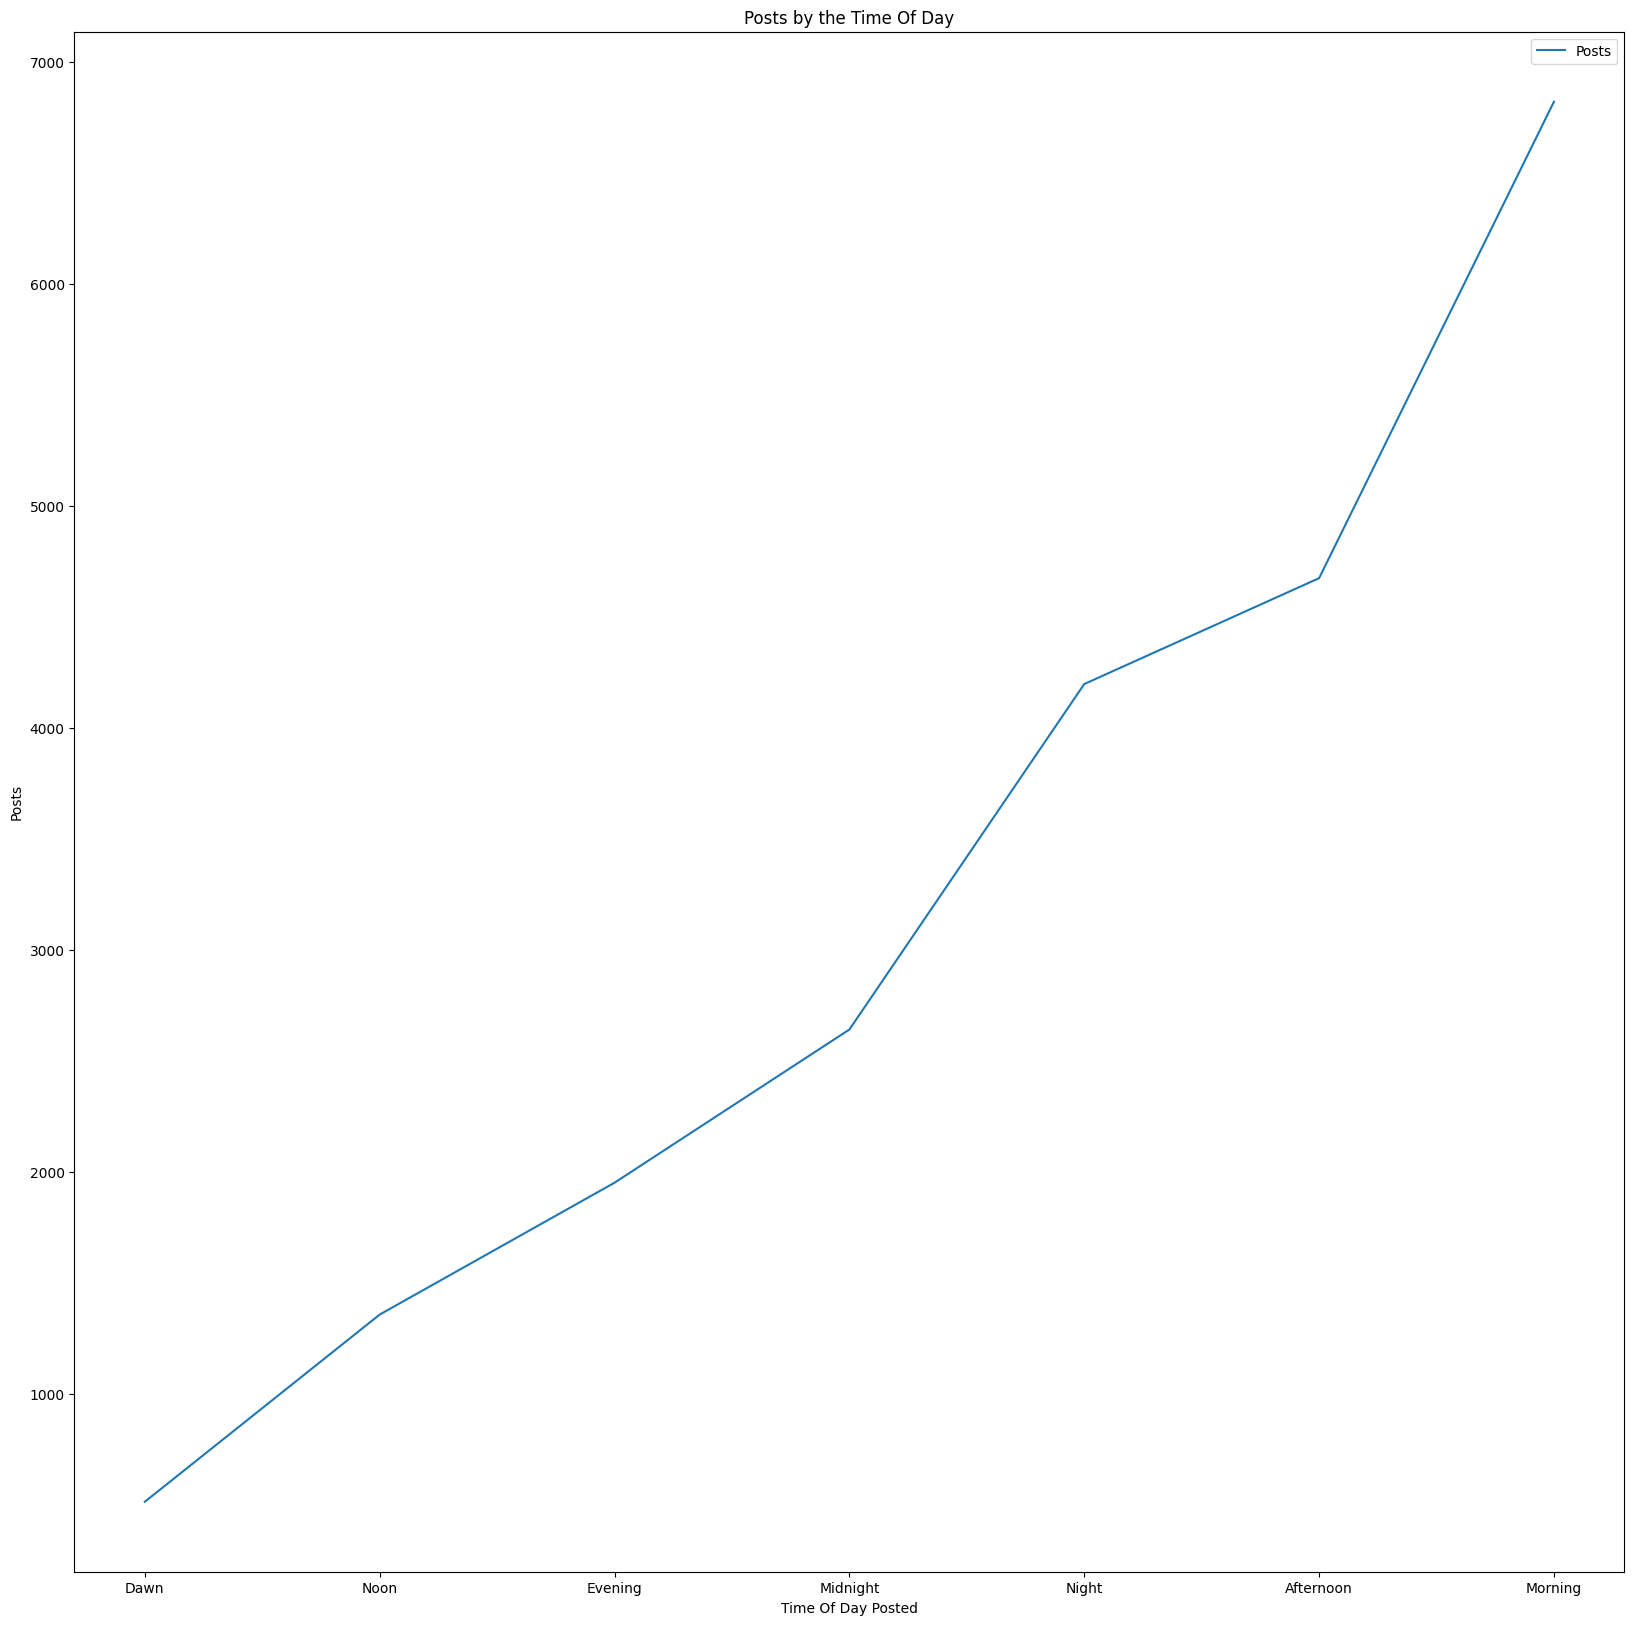

In [16]:
graph('time_of_day', 'upvotes', 'Posts', 'Time Of Day Posted', 'Posts', 'Posts by the Time Of Day', 'line')

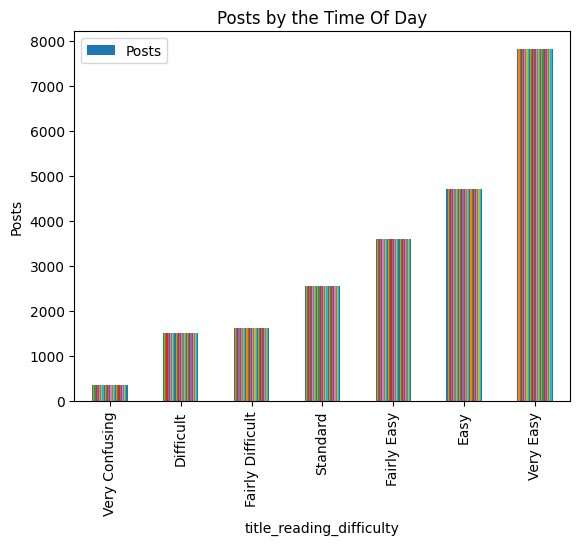

In [9]:
graph('title_reading_difficulty', 'upvotes', 'Posts', 'title_reading_difficulty', 'Posts', 'Posts by the Time Of Day', 'bar')

# Correlation of df

In [20]:
df.corr(numeric_only=True)

,title_length,title_word_count,title_avg_word_length,title_syllables,title_reading_score,title_polarity,title_subjectivity,story_length,story_word_count,story_avg_word_length,...,amount_sentences,avg_words_per_sentence,avg_syllables_per_sentence,avg_polarity_per_sentence,avg_subjectivity_per_sentence,avg_readscore_per_sentence,num_comments,upvotes,upvote_ratio,downvotes
title_length,1.000000,0.981017,-0.002125,0.990260,-0.228024,0.030933,0.176591,0.113318,0.092077,0.302976,...,0.014549,0.146537,0.192613,0.071758,0.074689,-0.337187,0.176413,0.161831,-0.211332,0.148612
title_word_count,0.981017,1.000000,-0.142968,0.972944,-0.120409,0.037177,0.175193,0.105586,0.088101,0.242472,...,0.016150,0.143227,0.180040,0.072933,0.083312,-0.295054,0.166226,0.160523,-0.201829,0.138192
title_avg_word_length,-0.002125,-0.142968,1.000000,-0.003130,-0.666983,-0.033628,-0.002262,0.013067,0.003334,0.202010,...,-0.003306,-0.003818,0.026096,-0.017921,-0.027551,-0.125088,0.021543,-0.007266,-0.006443,0.021246
title_syllables,0.990260,0.972944,-0.003130,1.000000,-0.290690,0.029470,0.177479,0.108462,0.087962,0.295396,...,0.011624,0.148516,0.195291,0.072544,0.079908,-0.339681,0.191699,0.185854,-0.221695,0.163777
title_reading_score,-0.228024,-0.120409,-0.666983,-0.290690,1.000000,0.020816,-0.066145,-0.006478,0.002506,-0.200000,...,0.028304,-0.058533,-0.096334,-0.015836,-0.038340,0.206963,-0.129028,-0.135506,0.109998,-0.120144
title_polarity,0.030933,0.037177,-0.033628,0.029470,0.020816,1.000000,-0.028241,-0.042928,-0.043567,0.008202,...,-0.042741,0.006527,0.008326,0.159100,0.016223,-0.012837,0.011620,0.033824,-0.019267,0.023904
title_subjectivity,0.176591,0.175193,-0.002262,0.177479,-0.066145,-0.028241,1.000000,0.008938,0.008123,0.006603,...,-0.003609,0.040912,0.044202,0.028543,0.131259,-0.029854,-0.026530,0.002911,0.003097,-0.017365
story_length,0.113318,0.105586,0.013067,0.108462,-0.006478,-0.042928,0.008938,1.000000,0.997402,0.076911,...,0.929782,-0.031875,-0.021273,-0.074086,-0.063469,-0.004512,-0.061333,-0.017005,0.084888,-0.060894
story_word_count,0.092077,0.088101,0.003334,0.087962,0.002506,-0.043567,0.008123,0.997402,1.000000,0.037315,...,0.937245,-0.035528,-0.031011,-0.076317,-0.062336,0.023660,-0.064918,-0.017093,0.090318,-0.064753
story_avg_word_length,0.302976,0.242472,0.202010,0.295396,-0.200000,0.008202,0.006603,0.076911,0.037315,1.000000,...,-0.010136,0.062517,0.178815,0.064611,-0.025079,-0.653869,0.152517,0.087127,-0.188559,0.154957


# Heat Map of Correlations

Heat map doesn't seem to show anything too significant, it seems that most the relationships are nonlinear. There a relationships, but nothing with the success metrics.

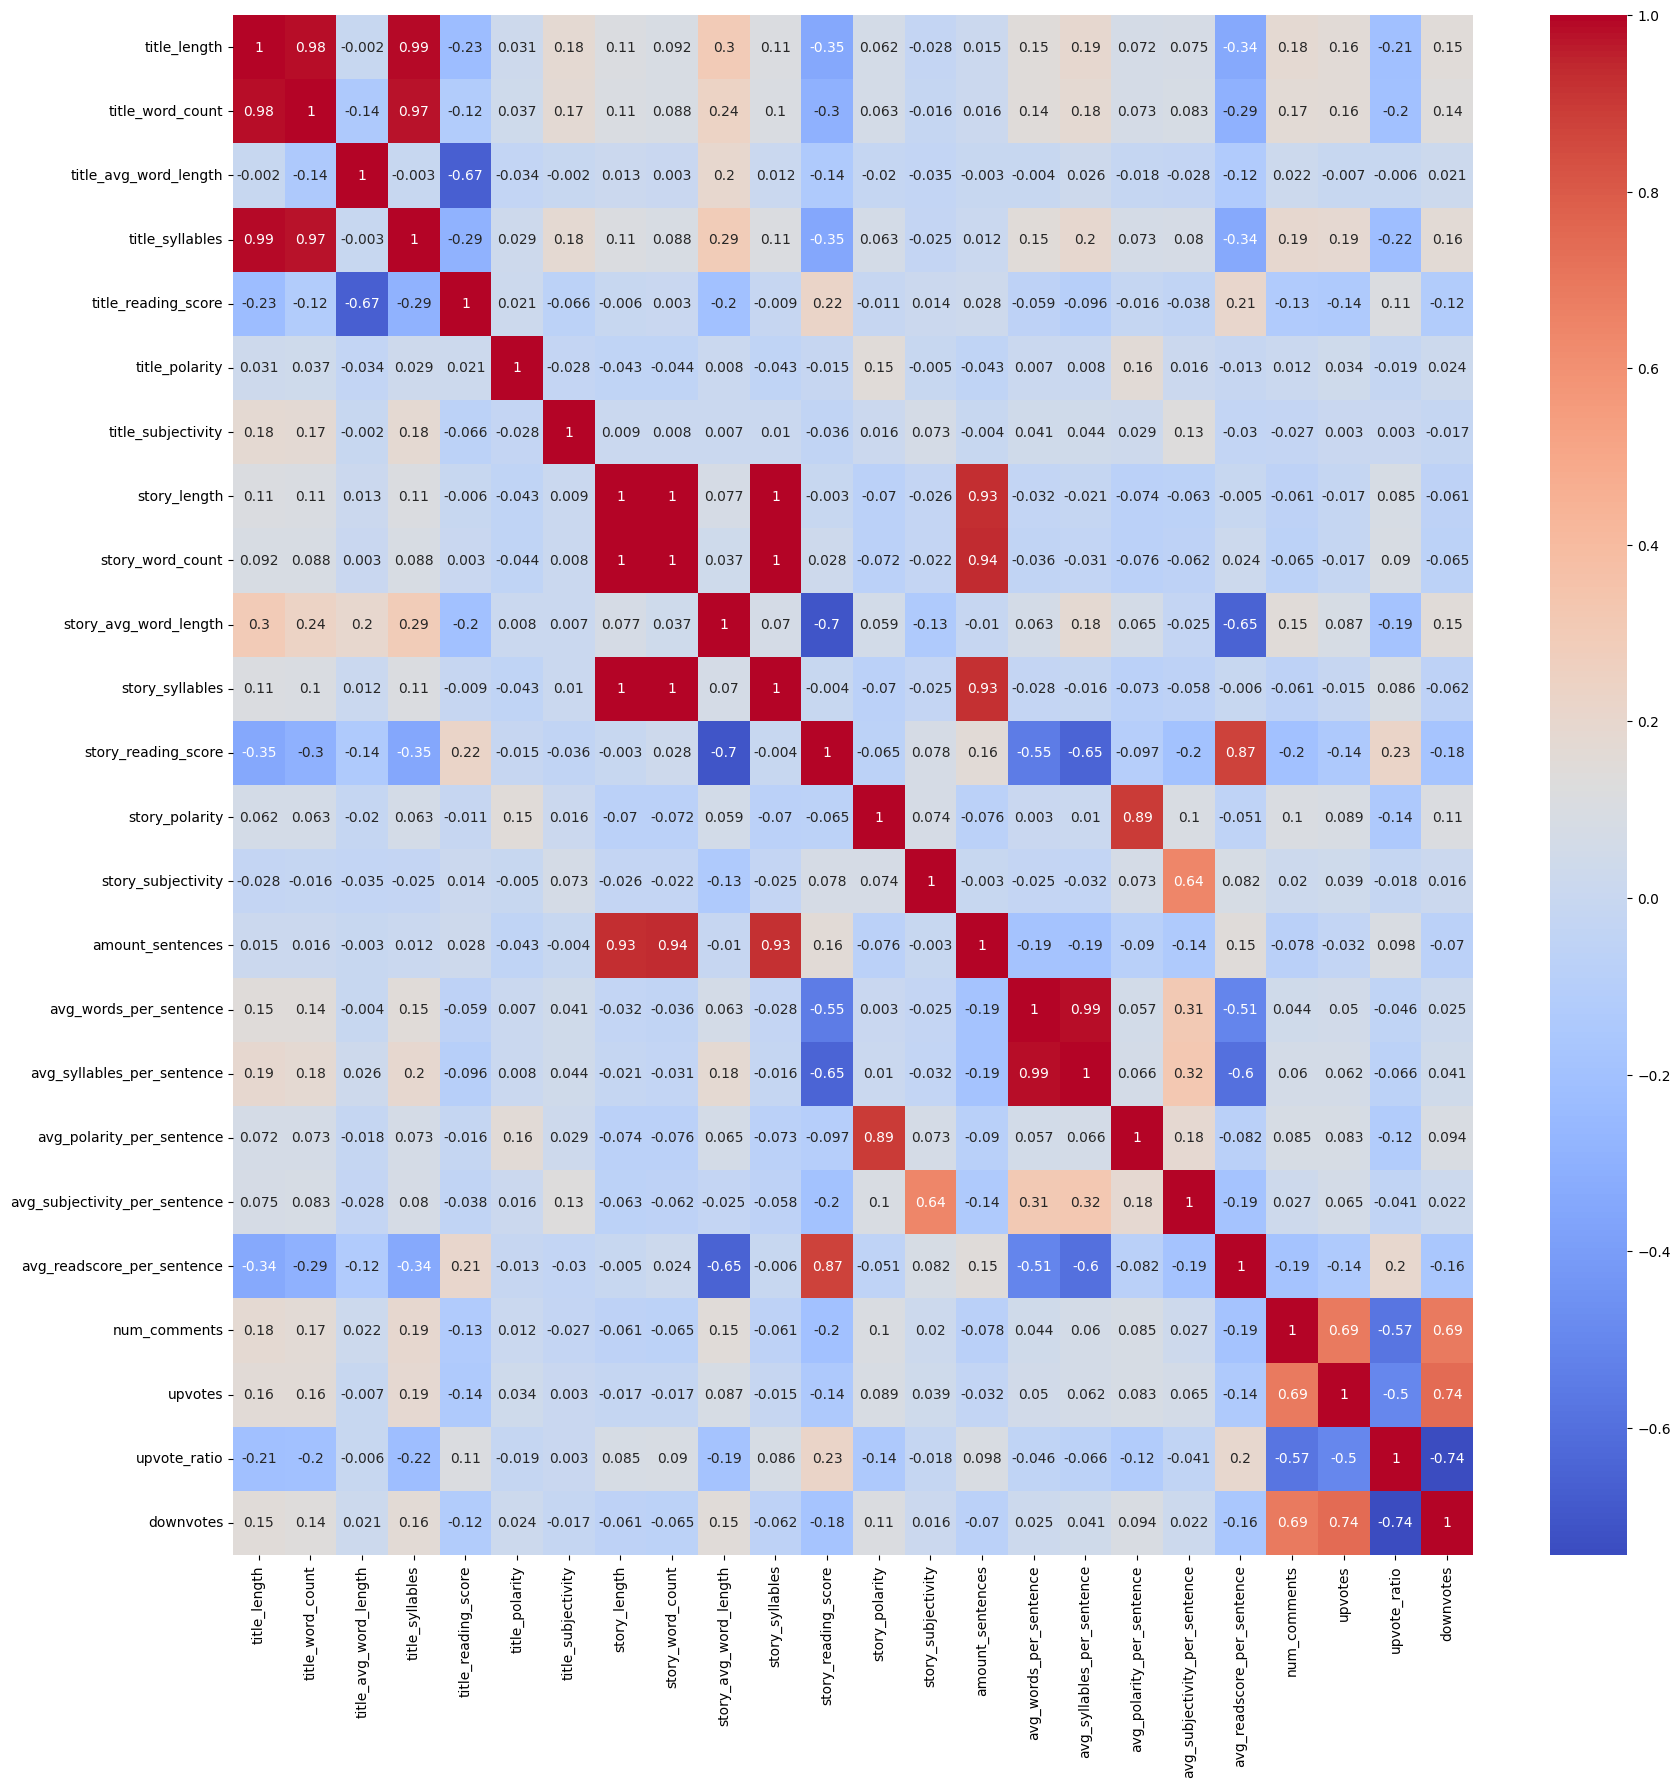

In [24]:
sns.heatmap(df.corr(numeric_only=True).apply(lambda x: round(x, 3)), annot=True, cmap='coolwarm')

plt.rcParams['figure.figsize'] = (20, 20)

plt.show()

In [12]:
success_metrics = ['num_comments', 'upvotes', 'downvotes']
df.columns

Index(['id', 'subreddit', 'date', 'time_of_day', 'title_length',
       'title_word_count', 'title_avg_word_length', 'title_syllables',
       'title_reading_score', 'title_reading_grade',
       'title_reading_difficulty', 'title_polarity', 'title_subjectivity',
       'story_length', 'story_word_count', 'story_avg_word_length',
       'story_syllables', 'story_reading_score', 'story_reading_grade',
       'story_reading_difficulty', 'story_polarity', 'story_subjectivity',
       'amount_sentences', 'avg_words_per_sentence',
       'avg_syllables_per_sentence', 'avg_polarity_per_sentence',
       'avg_subjectivity_per_sentence', 'avg_readscore_per_sentence',
       'num_comments', 'upvotes', 'upvote_ratio', 'downvotes'],
      dtype='object')

### General plots between success metrics and other variables

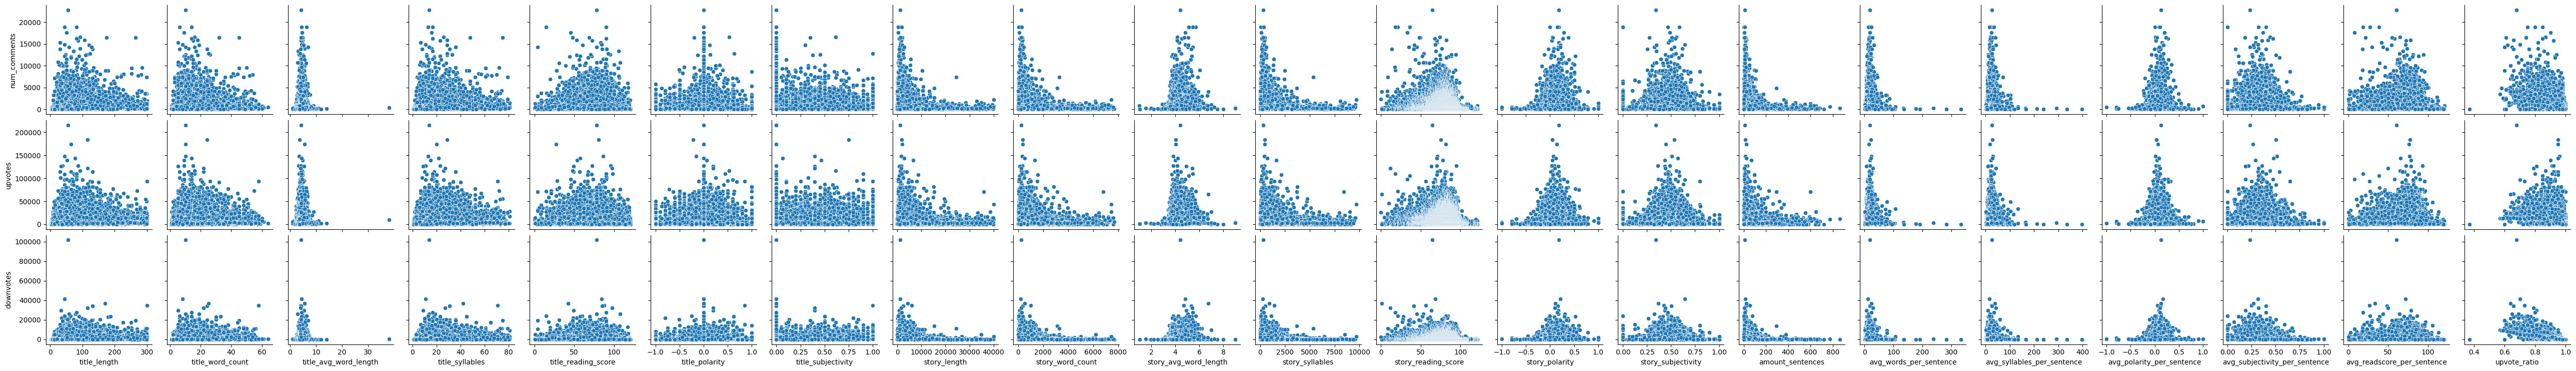

In [13]:
numerical_columns = [col for col in df.select_dtypes(include='number').columns.tolist() if col not in success_metrics]

sns.pairplot(
    df,
    x_vars=numerical_columns,
    y_vars=success_metrics,
)


General impressions:
- There seems to be a lot of skew within the data, most relationships are nonlinear, if not all.
- Some plots seem to have a normal distribution but most seem to be non-normal distributions.
- The plots of upvotes, comments, and downvotes all look relatively the same and so one can be just utilized in order apply to all.
- A/B Testing will be done in order to handle both questions